In [1]:
ls

Shopkick_POC.ipynb        data_top_7000.csv         shopkick.csv
data_not_engaged.csv      data_top_7000_14000.csv   shopkick_final.csv
data_top_14000_21000.csv  data_top_last.csv         shopkick_modified.csv
data_top_21000_28000.csv  fraud_data.csv            shopkick_with_Target.csv


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
import pandas as pd

In [5]:
data_kicks = pd.read_csv("shopkick_with_Target.csv",low_memory=False)

In [47]:
data_kicks.head()

user_id  signup_day  is_fraudster profile_gender  profile_age  \
0  34245751354  2017-10-19             1         female         33.0   
1  28697635187  2017-01-28             0        unknown          NaN   
2  29005152258  2017-03-31             0        unknown         32.0   
3  28846430713  2017-02-28             0         female         52.0   
4  29200831573  2017-04-21             0           male         45.0   

  profile_has_children profile_home_owner_status profile_postal_code  \
0                 True                home_owner               38305   
1              unknown                   unknown               98012   
2              unknown                   unknown             unknown   
3              unknown                    renter               60162   
4                 True                home_owner             unknown   

        profile_ethnicity profile_has_linked_cards     ...     signup_month  \
0  black_african_american                     True     ...               10   
1                 unknown                  unknown     ...                1   
2                 unknown                  unknown     ...                3   
3  black_african_american                     True     ...                2   
4  black_african_american                  unknown     ...                4   

  signup_date  signup_year_month  signup_period  profile_age_bins  \
0          19         2017-10-01            133          (30, 35]   
1          28         2017-01-01            397               NaN   
2          31         2017-03-01            335          (30, 35]   
3          28         2017-02-01            366          (50, 55]   
4          21         2017-04-01            314          (40, 45]   

   Is_Engaged_30 Is_Engaged_90  Is_Engaged_180  Is_Engaged_365  Is Engaged  
0            yes           yes             yes             yes         yes  
1             no            no              no             yes         yes  
2             no           yes             yes             yes         yes  
3            yes           yes             yes             yes         yes  
4             no           yes             yes             yes         yes  

[5 rows x 55 columns]

In [36]:
data_kicks.shape

(34598, 55)

In [35]:
del data_kicks['Unnamed: 0.1']

In [26]:
from keras.utils import to_categorical

In [29]:
np.where((data_kicks['Is_Engaged_30'] == 'yes') ,1 ,0)

array([1, 0, 0, ..., 0, 0, 0])

In [30]:
to_categorical(np.where((data_kicks['Is_Engaged_30'] == 'yes') ,1 ,0))

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [25]:
data_kicks['Is_Engaged_30'].values

array(['yes', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [24]:
data_kicks['signup_day'].value_counts()

2017-11-24    339
2017-11-25    276
2017-12-16    218
2017-11-23    214
2017-11-26    212
2017-12-15    205
2018-01-03    199
2017-12-17    199
2017-12-30    197
2018-01-04    196
2017-12-26    192
2017-11-05    188
2017-12-28    187
2018-01-01    183
2017-12-14    183
2017-11-12    182
2017-11-30    180
2017-12-03    177
2017-12-02    175
2017-11-18    174
2017-11-27    173
2018-01-07    172
2017-12-27    171
2017-12-06    169
2017-11-28    168
2017-12-23    168
2017-11-11    167
2017-12-18    165
2017-11-04    165
2017-12-31    161
             ... 
2018-02-17     36
2017-03-08     36
2018-02-04     35
2018-02-11     35
2017-02-14     35
2018-02-19     34
2018-02-02     28
2017-04-10     28
2018-02-16     27
2018-01-30     27
2018-01-29     27
2018-02-08     26
2018-02-07     24
2018-01-31     23
2018-02-12     22
2018-02-20     22
2018-02-23     21
2018-02-14     20
2018-02-24     19
2018-02-13     19
2018-02-25     18
2018-02-15     17
2018-02-01     17
2018-02-06     16
2018-02-05

In [447]:
from IPython.core.display import HTML

In [38]:
data_kicks.dtypes

user_id                          int64
signup_day                      object
is_fraudster                     int64
profile_gender                  object
profile_age                    float64
profile_has_children            object
profile_home_owner_status       object
profile_postal_code            float64
profile_ethnicity               object
profile_has_linked_cards        object
profile_household_income        object
profile_relationship_status     object
visits_30_days                   int64
visits_90_days                   int64
visits_180_days                  int64
visits_365_days                  int64
Vist Points                     object
engagements_30_days              int64
engagements_90_days              int64
engagements_180_days             int64
engagements_365_days             int64
Engagement Points               object
purchases_30_days                int64
purchases_90_days                int64
purchases_180_days               int64
purchases_365_days       

In [44]:
data_kicks.iloc[0]

user_id                                     34245751354
signup_day                                   2017-10-19
is_fraudster                                          1
profile_gender                                   female
profile_age                                          33
profile_has_children                               True
profile_home_owner_status                    home_owner
profile_postal_code                               38305
profile_ethnicity                black_african_american
profile_has_linked_cards                           True
profile_household_income                  75,000-99,999
profile_relationship_status    married_domestic_partner
visits_30_days                                       67
visits_90_days                                      243
visits_180_days                                     284
visits_365_days                                     284
Vist Points                                         yes
engagements_30_days                             

In [43]:
data_kicks['profile_postal_code'].fillna('unknown', inplace=True)

In [45]:
data_kicks['profile_postal_code'].astype('category')

0          38305
1          98012
2        unknown
3          60162
4        unknown
5        unknown
6        unknown
7        unknown
8        unknown
9          47396
10         34684
11       unknown
12       unknown
13         38917
14       unknown
15         78726
16         17345
17         62269
18         62221
19         36109
20       unknown
21       unknown
22       unknown
23       unknown
24         79423
25         12110
26       unknown
27       unknown
28       unknown
29         29706
          ...   
34568    unknown
34569    unknown
34570    unknown
34571    unknown
34572    unknown
34573    unknown
34574    unknown
34575    unknown
34576      45403
34577    unknown
34578    unknown
34579    unknown
34580    unknown
34581    unknown
34582    unknown
34583    unknown
34584    unknown
34585    unknown
34586    unknown
34587      74055
34588      12590
34589    unknown
34590    unknown
34591    unknown
34592    unknown
34593    unknown
34594    unknown
34595    unkno

In [46]:
data_kicks['profile_postal_code'].value_counts()

unknown    22130
32825.0       14
30909.0       13
33647.0       12
77433.0       12
23464.0       12
34787.0       11
78501.0       11
77494.0       11
77449.0       11
20772.0       11
23456.0       11
75052.0       10
78045.0       10
31088.0       10
91710.0       10
78521.0       10
30907.0        9
60626.0        9
16001.0        9
33024.0        9
23454.0        9
77571.0        9
78249.0        9
78247.0        9
34711.0        9
77084.0        9
29732.0        9
78550.0        9
92880.0        9
           ...  
29620.0        1
7649.0         1
7647.0         1
73179.0        1
40409.0        1
29626.0        1
24018.0        1
24017.0        1
24016.0        1
7631.0         1
73165.0        1
7628.0         1
73162.0        1
46011.0        1
46013.0        1
45782.0        1
7607.0         1
73142.0        1
76541.0        1
77021.0        1
40370.0        1
29640.0        1
73135.0        1
73133.0        1
73130.0        1
89513.0        1
29646.0        1
89508.0       

In [534]:
data_kicks[['kicks_30_days','kicks_30_90_days','kicks_90_180_days','kicks_180_365_days']]/[30,60,90,185]

kicks_30_days  kicks_30_90_days  kicks_90_180_days  kicks_180_365_days
0         118.666667       3856.100000        2305.811111            0.000000
1         958.600000       1357.533333         986.711111          467.372973
2        1171.066667       1552.150000         754.066667          332.772973
3         459.466667        461.433333         541.811111          672.497297
4         997.266667       1084.366667         704.677778          128.178378
5         215.400000        644.500000         791.422222          351.654054
6         501.500000        529.966667         764.244444          295.713514
7         983.200000        513.900000        1077.411111           56.194595
8         582.466667        554.083333         698.422222          268.545946
9           0.000000          0.000000        1778.277778            2.902703
10        245.633333        185.566667         226.111111          644.400000
11        181.333333        280.916667         431.944444          518.081081
12       1043.966667       1169.716667         289.544444          154.540541
13        914.166667       1544.883333         387.400000            0.000000
14        417.333333        496.233333         664.577778          264.156757
15        247.666667        144.933333         264.044444          581.475676
16        318.166667        299.083333         391.000000          454.108108
17        240.866667        267.683333         347.877778          493.789189
18        199.000000        242.583333         319.233333          516.329730
19         63.066667       1239.983333         760.866667            0.000000
20        596.666667        714.100000         535.411111          186.459459
21        302.433333        668.766667         712.055556          160.205405
22        416.133333        320.116667         411.866667          395.627027
23         87.333333        657.666667         562.822222          241.659459
24        207.166667        258.400000         311.288889          468.016216
25        214.666667        252.783333         271.288889          478.697297
26       1076.400000        269.566667         416.711111          260.221622
27       1199.933333        645.633333         143.333333          238.545946
28        772.733333        902.383333         477.144444           58.816216
29        878.466667        719.650000         275.433333          184.091892
...              ...               ...                ...                 ...
34568       1.666667          0.000000           0.000000           -0.200000
34569       0.033333          0.200000           0.000000            0.000000
34570       0.033333          0.200000           0.000000            0.000000
34571       0.033333          0.000000           0.133333            0.000000
34572       0.000000          0.200000           0.000000            0.000000
34573       0.000000          0.200000           0.000000            0.000000
34574       0.000000          0.000000           0.133333            0.000000
34575       0.066667          0.000000           0.100000            0.000000
34576       0.000000          0.166667           0.000000            0.000000
34577       0.033333          0.150000           0.000000            0.000000
34578       0.066667          0.100000           0.000000            0.000000
34579       0.100000          0.000000           0.033333            0.000000
34580       0.000000          0.100000           0.000000            0.000000
34581       0.000000          0.000000           0.066667            0.000000
34582       0.033333          0.066667           0.000000            0.000000
34583       0.033333          0.050000           0.000000            0.000000
34584       0.833333          0.000000           0.000000           -0.129730
34585       0.000000          0.000000           0.000000            0.005405
34586       0.833333          0.000000           0.000000           -0.129730
34587       0.000000         

In [10]:
data_kicks['is_fraudster'].value_counts()

0    34530
1       68
Name: is_fraudster, dtype: int64

In [11]:
data_kicks[:7000]['is_fraudster'].value_counts()

0    6949
1      51
Name: is_fraudster, dtype: int64

In [12]:
data_kicks[7000:]['is_fraudster'].value_counts()

0    27581
1       17
Name: is_fraudster, dtype: int64

In [13]:
17.0/68

0.25

In [65]:
data_kicks.to_csv("shopkick_latest.csv")

In [14]:
data_kicks[data_kicks['is_fraudster'] == 1].describe()

Unnamed: 0  Unnamed: 0.1       user_id  is_fraudster  profile_age  \
count     68.000000     68.000000  6.800000e+01          68.0    62.000000   
mean    5896.750000   5896.735294  3.272743e+10           1.0    37.258065   
std     7633.220786   7633.132049  4.071538e+09           0.0    10.128576   
min        0.000000      0.000000  2.858767e+10           1.0    18.000000   
25%      779.500000    779.500000  2.936679e+10           1.0    30.250000   
50%     3148.500000   3148.500000  3.028515e+10           1.0    37.000000   
75%     7041.000000   7041.000000  3.816918e+10           1.0    42.000000   
max    30856.000000  30857.000000  3.870851e+10           1.0    66.000000   

       profile_postal_code  visits_30_days  visits_90_days  visits_180_days  \
count            42.000000       68.000000       68.000000        68.000000   
mean          47711.404762       33.794118       96.367647       166.970588   
std           30393.506244       31.617848       80.751120       155.407406   
min            2120.000000        0.000000        4.000000         4.000000   
25%           22193.000000        6.000000       21.750000        34.250000   
50%           45725.000000       21.500000       78.500000       122.000000   
75%           76690.750000       57.500000      150.750000       238.750000   
max           98606.000000      118.000000      288.000000       618.000000   

       visits_365_days      ...        engagements_30_90_days  \
count        68.000000      ...                     68.000000   
mean        242.794118      ...                    266.808824   
std         262.599210      ...                    277.451206   
min           4.000000      ...                      0.000000   
25%          36.000000      ...                     60.500000   
50%         154.000000      ...                    169.000000   
75%         317.750000      ...                    410.000000   
max        1130.000000      ...                   1325.000000   

       engagements_90_180_days  engagements_180_365_days  \
count                68.000000                 68.000000   
mean                262.647059                319.808824   
std                 403.434463                668.455878   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                  46.500000                  0.000000   
75%                 349.250000                269.250000   
max                1997.000000               2849.000000   

       purchases_30_90_days  purchases_90_180_days  purchases_180_365_days  \
count             68.000000              68.000000               68.000000   
mean              52.073529              16.014706               33.573529   
std              183.929685              51.381073              244.610035   
min                0.000000               0.000000                0.000000   
25%                0.000000               0.000000                0.000000   
50%                1.500000               0.000000                0.000000   
75%                9.750000               7.500000                2.000000   
max             1060.000000             332.000000             2019.000000   

       signup_year  signup_month  signup_date  signup_period  
count    68.000000     68.000000    68.000000      68.000000  
mean   2017.029412      7.470588    18.000000     200.088235  
std       0.170214      3.671067     8.858759     109.296903  
min    2017.000000      1.000000     1.000000      55.000000  
25%    2017.000000      4.000000    11.000000     111.750000  
50%    2017.000000      8.500000    18.000000     165.500000  
75%    2017.000000     11.000000    25.250000     280.500000  
max    2018.000000     12.000000    31.000000     417.000000  

[8 rows x 39 columns]

In [678]:
data_kicks['profile_age'].describe().round()

count    31315.0
mean        38.0
std         12.0
min         13.0
25%         28.0
50%         36.0
75%         46.0
max        118.0
Name: profile_age, dtype: float64

In [15]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [17]:
import numpy as np

In [679]:
data_kicks['profile_age'][:7000].describe().round()

count    6688.0
mean       42.0
std        12.0
min        13.0
25%        32.0
50%        40.0
75%        50.0
max       118.0
Name: profile_age, dtype: float64

In [680]:
data_kicks['profile_age'][7000:].describe().round()

count    24627.0
mean        37.0
std         12.0
min         13.0
25%         27.0
50%         35.0
75%         45.0
max        118.0
Name: profile_age, dtype: float64

In [681]:
#Missing values for Age 

In [682]:
7000 - 6688

312

In [684]:
data_kicks.shape[0] - 24627 - 7000

2971

In [ ]:
data_kicks.shape[0] - 31315.0

In [ ]:
data_kicks['kicks_30_90_days','kicks_90_180_days', 'kicks_180_365_days',][]

In [48]:
list(data_kicks.columns)

['user_id',
 'signup_day',
 'is_fraudster',
 'profile_gender',
 'profile_age',
 'profile_has_children',
 'profile_home_owner_status',
 'profile_postal_code',
 'profile_ethnicity',
 'profile_has_linked_cards',
 'profile_household_income',
 'profile_relationship_status',
 'visits_30_days',
 'visits_90_days',
 'visits_180_days',
 'visits_365_days',
 'Vist Points',
 'engagements_30_days',
 'engagements_90_days',
 'engagements_180_days',
 'engagements_365_days',
 'Engagement Points',
 'purchases_30_days',
 'purchases_90_days',
 'purchases_180_days',
 'purchases_365_days',
 'Purchase Points',
 'kicks_30_days',
 'kicks_90_days',
 'kicks_180_days',
 'kicks_365_days',
 'Kick Points',
 'kicks_30_90_days',
 'kicks_90_180_days',
 'kicks_180_365_days',
 'visits_30_90_days',
 'visits_90_180_days',
 'visits_180_365_days',
 'engagements_30_90_days',
 'engagements_90_180_days',
 'engagements_180_365_days',
 'purchases_30_90_days',
 'purchases_90_180_days',
 'purchases_180_365_days',
 'signup_year',
 's

In [27]:
type(data['kicks_365_days'].loc[0])

numpy.int64

In [51]:
data['kicks_365_days'] = pd.Series([int(data['kicks_365_days'].loc[i].replace(',','')) for i in range(data.shape[0])])

In [52]:
data.to_csv("shopkick.csv")

In [543]:
data_kicks.iloc[0]

user_id                                     34245751354
signup_day                          2017-10-19 00:00:00
is_fraudster                                          1
profile_gender                                   female
profile_age                                          33
profile_has_children                               True
profile_home_owner_status                    home_owner
profile_postal_code                               38305
profile_ethnicity                black_african_american
profile_has_linked_cards                           True
profile_household_income                  75,000-99,999
profile_relationship_status    married_domestic_partner
visits_30_days                                       67
visits_90_days                                      243
visits_180_days                                     284
visits_365_days                                     284
Vist Points                                         NaN
engagements_30_days                             

In [539]:
data_kicks.iloc[7000]['kicks_365_days']

10019

In [627]:
import numpy as np

In [628]:
from collections import Counter

 # Target - Based on Std Deviations

In [ ]:
data_kicks['section']

In [560]:
# Visits

In [629]:
visit_std = [24,64,112,171]

In [630]:
Counter(np.where((data_kicks['visits_30_days'] >= 24) | (data_kicks['visits_90_days'] >= 64) 
                 | (data_kicks['visits_180_days'] >= 112) | (data_kicks['visits_365_days'] >= 171)
                   , 'yes', 'no'))

Counter({'no': 24410, 'yes': 10188})

In [ ]:
data_kicks['visits_30]

In [583]:
10178/(24420.0 + 10178)

0.2941788542690329

In [559]:
Counter(np.where((data_kicks['visits_30_days'] >= 24) & (data_kicks['visits_90_days'] >= 64) 
                 & (data_kicks['visits_180_days'] >= 112) & (data_kicks['visits_365_days'] >= 172)
                   , 'yes', 'no'))

Counter({'no': 32399, 'yes': 2199})

In [585]:
2199.0/(32399.0 + 2199)

0.06355858720157234

In [562]:
# Engagements 

In [564]:
engagement_vector = [716,469,271,116]

In [631]:
Counter(np.where((data_kicks['engagements_30_days'] >= 116) | (data_kicks['engagements_90_days'] >= 271) 
                 | (data_kicks['engagements_180_days'] >= 469) | (data_kicks['engagements_365_days'] >= 716)
                   , 'yes', 'no'))

Counter({'no': 29814, 'yes': 4784})

In [632]:
4784/(29814.0 + 4784)

0.13827388866408463

In [567]:
Counter(np.where((data_kicks['engagements_30_days'] >= 116) &(data_kicks['engagements_90_days'] >= 271) 
                 &(data_kicks['engagements_180_days'] >= 469) &(data_kicks['engagements_365_days'] >= 716)
                   , 'yes', 'no'))

Counter({'no': 33596, 'yes': 1002})

In [587]:
1002.0/(1002 + 33596)

0.0289612116307301

#     Purchases

In [568]:
purchases = [64,98,145,191]

In [633]:
Counter(np.where((data_kicks['purchases_30_days'] >= 64) | (data_kicks['purchases_90_days'] >= 98) 
                 | (data_kicks['purchases_180_days'] >= 145) | (data_kicks['purchases_365_days'] >= 191)
                   , 'yes', 'no'))

Counter({'no': 33757, 'yes': 841})

In [634]:
841/(32729.0 + 1869)

0.024307763454534944

In [571]:
Counter(np.where((data_kicks['purchases_30_days'] >= 191) & (data_kicks['purchases_90_days'] >= 145) 
                 & (data_kicks['purchases_180_days'] >= 98) & (data_kicks['purchases_365_days'] >= 64)
                   , 'yes', 'no'))

Counter({'no': 34537, 'yes': 61})

In [589]:
61.0/(34537 + 61)

0.0017631076940863633

# Target Variables - Is Engaged 

In [668]:
data_kicks['Vist Points'] = np.where((data_kicks['visits_30_days'] >= 24) 
                  | (data_kicks['visits_90_days'] >= 64) 
                  |  (data_kicks['visits_180_days'] >= 112) 
                  | (data_kicks['visits_365_days'] >= 171)
                   , 'yes', 'no')

In [669]:
data_kicks['Engagement Points'] = np.where((data_kicks['engagements_30_days'] >= 116) 
                  | (data_kicks['engagements_90_days'] >= 271) 
                  |  (data_kicks['engagements_180_days'] >= 469) 
                  | (data_kicks['engagements_365_days'] >= 716)
                   , 'yes', 'no')

In [670]:
data_kicks['Purchase Points'] = np.where((data_kicks['purchases_30_days'] >= 64) 
                  | (data_kicks['purchases_90_days'] >= 98) 
                  |  (data_kicks['purchases_180_days'] >= 145) 
                  | (data_kicks['purchases_365_days'] >= 191)
                   , 'yes', 'no')

In [ ]:
data_kicks['Purchase Points'] = np.where((data_kicks['purchases_30_days'] >= 64) 
                  | (data_kicks['purchases_90_days'] >= 98) 
                  |  (data_kicks['purchases_180_days'] >= 145) 
                  | (data_kicks['purchases_365_days'] >= 191)
                   , 'yes', 'no')

In [618]:
data_kicks['Purchase Points'] = np.where((data_kicks['purchases_30_days'] >= 64) & (data_kicks['purchases_90_days'] >= 98) 
                 & (data_kicks['purchases_180_days'] >= 145) & (data_kicks['purchases_365_days'] >= 191)
                   , 'yes', 'no')

In [640]:
data_kicks['Is_Engaged_30'] = np.where((data_kicks['visits_30_days'] >= 24) 
                                       | (data_kicks['engagements_30_days'] >= 116) 
                                       | (data_kicks['purchases_30_days'] >= 64), 'yes','no')

In [641]:
data_kicks['Is_Engaged_30'].value_counts()

no     26424
yes     8174
Name: Is_Engaged_30, dtype: int64

In [642]:
data_kicks['Is_Engaged_90'] = np.where((data_kicks['visits_90_days'] >= 64) 
                                       | (data_kicks['engagements_90_days'] >= 271) 
                                       | (data_kicks['purchases_90_days'] >= 98), 'yes','no')

In [643]:
data_kicks['Is_Engaged_90'].value_counts()

no     28140
yes     6458
Name: Is_Engaged_90, dtype: int64

In [647]:
6458.0/data_kicks.shape[0]

0.1866581883345858

In [645]:
data_kicks['Is_Engaged_180'] = np.where((data_kicks['visits_180_days'] >= 112) 
                                       | (data_kicks['engagements_180_days'] >= 469) 
                                       | (data_kicks['purchases_180_days'] >= 145), 'yes','no')

In [646]:
data_kicks['Is_Engaged_180'].value_counts()

no     28997
yes     5601
Name: Is_Engaged_180, dtype: int64

In [648]:
5601.0/(data_kicks.shape[0])

0.16188797040291347

In [649]:
data_kicks['Is_Engaged_365'] = np.where((data_kicks['visits_365_days'] >= 171) 
                                       | (data_kicks['engagements_365_days'] >= 716) 
                                       | (data_kicks['purchases_365_days'] >= 191), 'yes','no')

In [650]:
data_kicks['Is_Engaged_365'].value_counts()

no     29643
yes     4955
Name: Is_Engaged_365, dtype: int64

In [666]:
Counter(np.where((data_kicks['visits_365_days'] >= 171) 
                & (data_kicks['engagements_365_days'] >= 716) 
                & (data_kicks['purchases_365_days'] >= 191), 'yes','no'))

Counter({'no': 34558, 'yes': 40})

In [652]:
Counter(np.where((data_kicks['Is_Engaged_30'] == 'yes') 
                 | (data_kicks['Is_Engaged_90'] == 'yes') 
                 | (data_kicks['Is_Engaged_180'] == 'yes') 
                 | (data_kicks['Is_Engaged_365'] == 'yes')
                 , 'yes','no'
                ))

Counter({'no': 23408, 'yes': 11190})

In [663]:
Counter(np.where((data_kicks['Is_Engaged_30'] == 'yes') 
                 & (data_kicks['Is_Engaged_90'] == 'yes') 
                 & (data_kicks['Is_Engaged_180'] == 'yes') 
                 & (data_kicks['Is_Engaged_365'] == 'yes')
                 , 'yes','no'
                ))

Counter({'no': 32085, 'yes': 2513})

In [665]:
2513.0/(32085+2513)

0.07263425631539396

In [660]:
data_kicks['Is Engaged'] = np.where((data_kicks['Is_Engaged_30'] == 'yes') 
                 | (data_kicks['Is_Engaged_90'] == 'yes') 
                 | (data_kicks['Is_Engaged_180'] == 'yes') 
                 | (data_kicks['Is_Engaged_365'] == 'yes')
                 , 'yes','no'
                )

In [674]:
data_kicks['Is Engaged'].value_counts()

no     23408
yes    11190
Name: Is Engaged, dtype: int64

In [675]:
11190.0/data_kicks.shape[0]

0.32342909994797386

In [661]:
del data_kicks['Is_Engaged']

In [672]:
data_kicks.to_csv('ShopKick_with_Target.csv')

In [673]:
ls

Shopkick_POC.ipynb        data_top_7000.csv         shopkick.csv
data_not_engaged.csv      data_top_7000_14000.csv   shopkick_final.csv
data_top_14000_21000.csv  data_top_last.csv         shopkick_modified.csv
data_top_21000_28000.csv  fraud_data.csv            shopkick_with_Target.csv


In [653]:
11190.0/(23408+11190)

0.32342909994797386

In [638]:
Counter(np.where((data_kicks['visits_30_days'] >= 24) | (data_kicks['engagements_30_days'] >= 116) 
                                       | (data_kicks['purchases_30_days'] >= 64), 'yes','no'))

Counter({'no': 26424, 'yes': 8174})

In [639]:
8174.0/(data_kicks.shape[0])

0.23625643100757268

In [619]:
Counter(np.where((data_kicks['Vist Points'] == 'yes') | (data_kicks['Engagement Points'] == 'yes')
                  | (data_kicks['Purchase Points'] == 'yes'),'yes','no'))

Counter({'no': 32138, 'yes': 2460})

In [614]:
Counter(np.where((data_kicks['visits_30_days'] >= 24) | (data_kicks['engagements_30_days'] >= 116)
                 | (data_kicks['purchases_30_days'] >= 191), 'yes','no'))

Counter({'no': 26544, 'yes': 8054})

In [615]:
Counter(np.where((data_kicks['visits_90_days'] >= 64) | (data_kicks['engagements_90_days'] >= 271)
                 | (data_kicks['purchases_90_days'] >= 145), 'yes','no'))

Counter({'no': 28290, 'yes': 6308})

In [ ]:
Counter(np.where((data_kicks['visits_180_days'] >= 112) | (data_kicks['engagements_180_days'] >= 469)
                 | (data_kicks['purchases_180_days'] >= ), 'yes','no'))

In [620]:
Counter(np.where((data_kicks['Vist Points'] == 'yes') | (data_kicks['Engagement Points'] == 'yes')
                  | (data_kicks['Purchase Points'] == 'yes'),'yes','no'))

Counter({'no': 32138, 'yes': 2460})

In [621]:
2460.0/(23770 + 10828)

0.07110237585987629

In [590]:
Counter(np.where((data_kicks['Vist Points'] == 'yes') & (data_kicks['Engagement Points'] == 'yes')
                  & (data_kicks['Purchase Points'] == 'yes'),'yes','no'))

Counter({'no': 34592, 'yes': 6})

# Target - Based on Means 

In [592]:
visits_mean = [225,250,83,29]

In [593]:
Counter(np.where((data_kicks['visits_30_days'] >= 29) | (data_kicks['visits_90_days'] >= 83) 
                 | (data_kicks['visits_180_days'] >= 250) | (data_kicks['visits_365_days'] >= 225)
                   , 'yes', 'no'))

Counter({'no': 27004, 'yes': 7594})

In [594]:
7594.0 /(7594 + 27004)

0.2194924562113417

In [595]:
engagement_mean = [707,478,269,98]

In [596]:
Counter(np.where((data_kicks['engagements_30_days'] >= 98) | (data_kicks['engagements_90_days'] >= 269) 
                 | (data_kicks['engagements_180_days'] >= 478) | (data_kicks['engagements_365_days'] >= 707)
                   , 'yes', 'no'))

Counter({'no': 29065, 'yes': 5533})

In [597]:
5533.0/(5533 + 29065)

0.15992253887507948

In [598]:
purchase_mean = [50,28,14,5]

In [600]:
Counter(np.where((data_kicks['purchases_30_days'] >= 5) | (data_kicks['purchases_90_days'] >= 14) 
                 | (data_kicks['purchases_180_days'] >= 28) | (data_kicks['purchases_365_days'] >= 50)
                   , 'yes', 'no'))

Counter({'no': 26682, 'yes': 7916})

In [601]:
7916.0 /(26682 + 7916)

0.22879935256373202

In [602]:
data_kicks['Vist Points'] = np.where((data_kicks['visits_30_days'] >= 29) | (data_kicks['visits_90_days'] >= 83) 
                 | (data_kicks['visits_180_days'] >= 250) | (data_kicks['visits_365_days'] >= 225)
                   , 'yes', 'no')

In [603]:
data_kicks['Engagement Points'] = np.where((data_kicks['engagements_30_days'] >= 98) | (data_kicks['engagements_90_days'] >= 269) 
                 | (data_kicks['engagements_180_days'] >= 478) | (data_kicks['engagements_365_days'] >= 707)
                   , 'yes', 'no')

In [604]:
data_kicks['Purchase Points'] = np.where((data_kicks['purchases_30_days'] >= 5) | (data_kicks['purchases_90_days'] >= 14) 
                 | (data_kicks['purchases_180_days'] >= 28) | (data_kicks['purchases_365_days'] >= 50)
                   , 'yes', 'no')

In [59]:
data_kicks['Kick Points'] = np.where((data_kicks['kicks_30_days'] >= 3592) | (data_kicks['kicks_90_days'] >= 8709) 
                 | (data_kicks['kicks_180_days'] >= 14116) | (data_kicks['kicks_365_days'] >= 19700)
                   , 'yes', 'no')

In [60]:
data_kicks['Kick Points'].value_counts()

no     28723
yes     5875
Name: Kick Points, dtype: int64

In [61]:
5875.0/(28723 +5875 )

0.16980750332389155

In [605]:
Counter(np.where((data_kicks['Vist Points'] == 'yes') | (data_kicks['Engagement Points'] == 'yes')
                  | (data_kicks['Purchase Points'] == 'yes'),'yes','no'))

Counter({'no': 21027, 'yes': 13571})

In [606]:
13571.0/(13571 + 21027)

0.39224810682698424

In [ ]:
data_kicks['Is_Engaged']

In [58]:
data_kicks['kicks_90_days'].describe().round()

count     34598.0
mean       3515.0
std        5139.0
min           0.0
25%         851.0
50%        2004.0
75%        4262.0
max      234926.0
Name: kicks_90_days, dtype: float64

In [56]:
data_kicks[7000:]['kicks_90_days'].describe().round()

count    27598.0
mean      2067.0
std       1873.0
min          0.0
25%        680.0
50%       1535.0
75%       2891.0
max      10006.0
Name: kicks_90_days, dtype: float64

In [57]:
data_kicks[:7000]['kicks_90_days'].describe().round()

count      7000.0
mean       9225.0
std        8709.0
min           0.0
25%        4225.0
50%        7106.0
75%       11566.0
max      234926.0
Name: kicks_90_days, dtype: float64

#                            Activities 

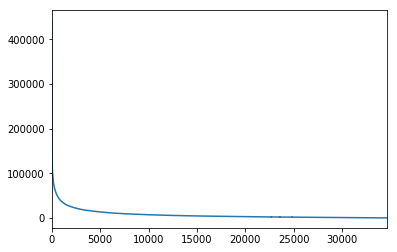

In [416]:
data_kicks['kicks_365_days'].plot()

In [455]:
data_2['kicks_365_days'].describe()

count    27598.000000
mean      3282.009204
std       2548.617000
min          0.000000
25%       1193.000000
50%       2624.500000
75%       4878.750000
max      10019.000000
Name: kicks_365_days, dtype: float64

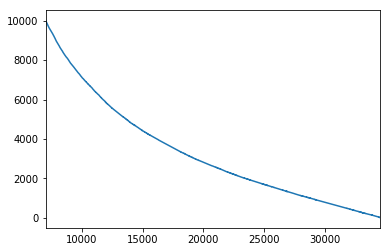

In [417]:
data_2['kicks_365_days'].plot()

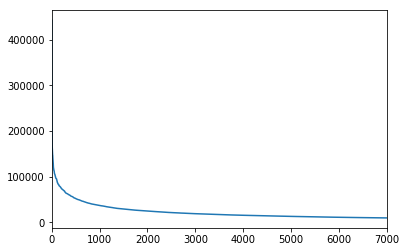

In [418]:
data_top1['kicks_365_days'].plot()

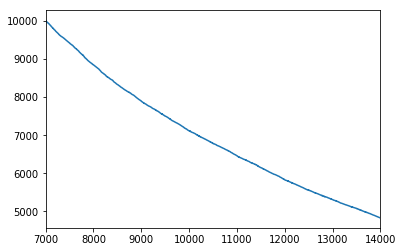

In [419]:
data_top2['kicks_365_days'].plot()

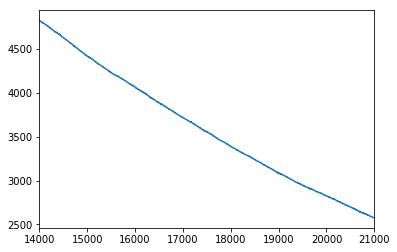

In [420]:
data_top3['kicks_365_days'].plot()

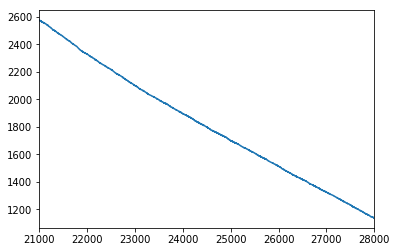

In [421]:
data_top4['kicks_365_days'].plot()

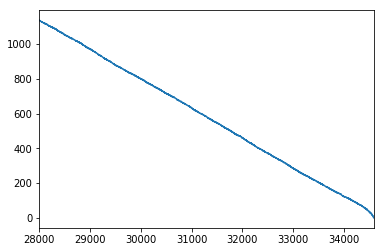

In [422]:
data_top5['kicks_365_days'].plot()

#                Kicks - 180 days

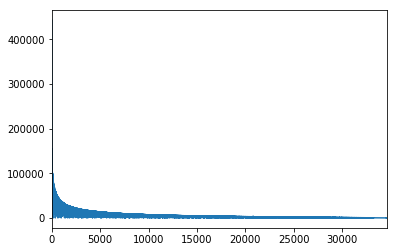

In [428]:
data_kicks['kicks_180_days'].plot()

In [441]:
data_top5.iloc[0]

user_id                                29862892135
signup_day                     2017-08-01 00:00:00
is_fraudster                                     0
profile_gender                              female
profile_age                                     45
profile_has_children                          True
profile_home_owner_status               home_owner
profile_postal_code                          34711
profile_ethnicity                  white_caucasian
profile_has_linked_cards                      True
profile_household_income           100,000-124,999
profile_relationship_status                unknown
visits_30_days                                   3
visits_90_days                                  11
visits_180_days                                 25
visits_365_days                                 29
Vist Points                                    NaN
engagements_30_days                              3
engagements_90_days                             10
engagements_180_days           

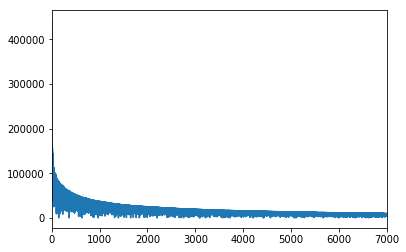

In [429]:
data_top1['kicks_180_days'].plot()

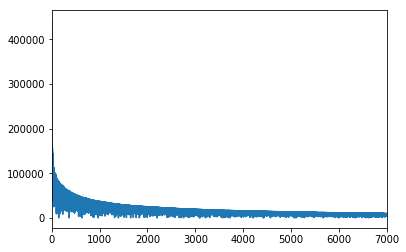

In [430]:
data_top1['kicks_180_days'].plot()

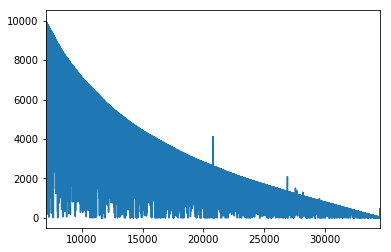

In [431]:
data_2['kicks_180_days'].plot()

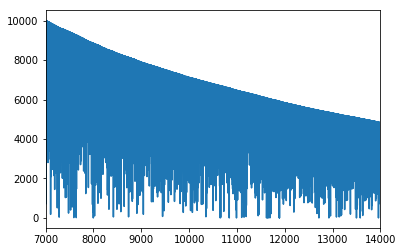

In [432]:
data_top2['kicks_180_days'].plot()

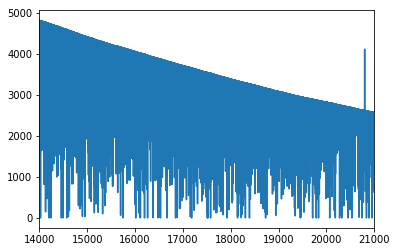

In [433]:
data_top3['kicks_180_days'].plot()

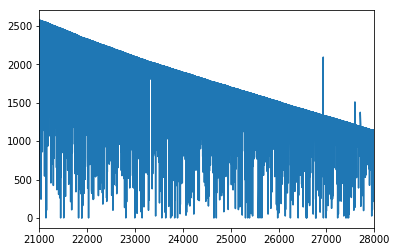

In [434]:
data_top4['kicks_180_days'].plot()

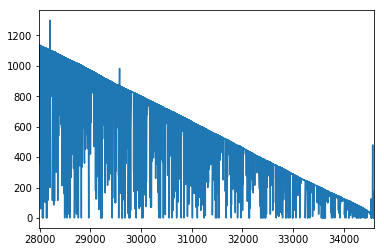

In [435]:
data_top5['kicks_180_days'].plot()

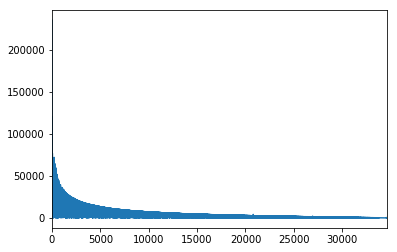

In [36]:
data['kicks_90_days'].plot()

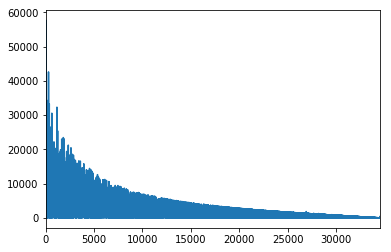

In [37]:
data['kicks_30_days'].plot()

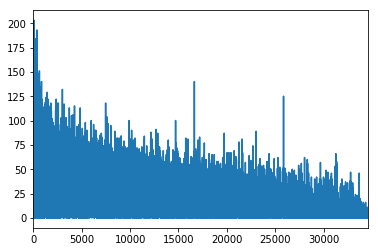

In [39]:
data['visits_30_days'].plot()

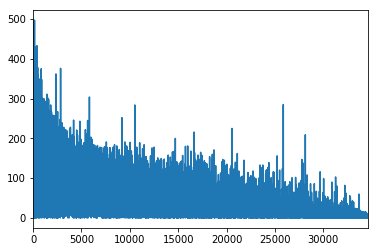

In [40]:
data['visits_90_days'].plot()

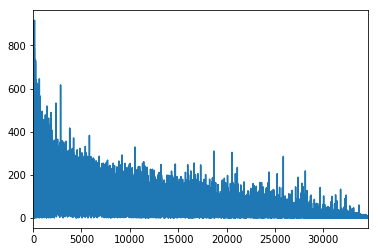

In [41]:
data['visits_180_days'].plot()

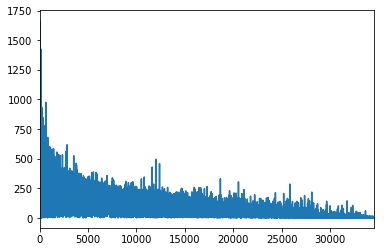

In [42]:
data['visits_365_days'].plot()

#                                         Activities 

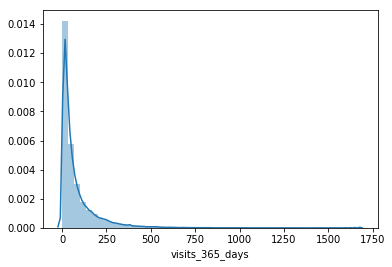

In [502]:
sns.distplot(data_kicks['visits_365_days']);

In [509]:
data_kicks[['visits_180_365_days','visits_90_180_days','visits_30_90_days']].describe()

visits_180_365_days  visits_90_180_days  visits_30_90_days
count         34598.000000        34598.000000       34598.000000
mean             20.836204           20.555206          20.428031
std              56.746060           40.952960          30.487946
min               0.000000            0.000000           0.000000
25%               0.000000            0.000000           2.000000
50%               0.000000            4.000000           9.000000
75%              14.000000           21.000000          25.000000
max             903.000000          600.000000         355.000000

In [519]:
data_2[['purchases_365_days','purchases_180_days','purchases_90_days','purchases_30_days']].describe().round(2)

purchases_365_days  purchases_180_days  purchases_90_days  \
count            27598.00            27598.00           27598.00   
mean                14.12               10.65               7.98   
std                 45.20               37.92              31.89   
min                  0.00                0.00               0.00   
25%                  2.00                1.00               0.00   
50%                  4.00                3.00               2.00   
75%                 11.00                8.00               5.00   
max               1276.00             1276.00            1276.00   

       purchases_30_days  
count           27598.00  
mean                4.05  
std                18.69  
min                 0.00  
25%                 0.00  
50%                 0.00  
75%                 2.00  
max               849.00

In [508]:
data_top1[['visits_365_days','visits_180_days','visits_90_days','visits_30_days']].describe()

visits_365_days  visits_180_days  visits_90_days  visits_30_days
count      7000.000000      7000.000000     7000.000000     7000.000000
mean        225.717714       150.821429       83.344000       29.612857
std         171.887729       112.031975       64.444145       24.759760
min           1.000000         0.000000        0.000000        0.000000
25%         114.000000        75.000000       37.000000       11.000000
50%         181.000000       123.000000       67.500000       23.000000
75%         287.250000       200.000000      114.000000       42.000000
max        1668.000000       917.000000      497.000000      203.000000

In [504]:
data_kicks['visits_180_days'].describe()

count    34598.000000
mean        56.973900
std         76.058017
min          0.000000
25%         12.000000
50%         30.000000
75%         69.000000
max        917.000000
Name: visits_180_days, dtype: float64

# Fitting Power - Law

In [43]:
import powerlaw

In [458]:
data_fit = list(data_kicks['visits_365_days']) # data can be list or numpy array
results = powerlaw.Fit(data_fit)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [459]:
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)

4.35821710082
479.0
0.146844580996


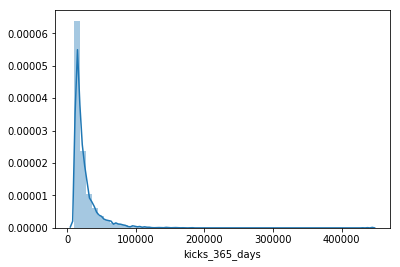

In [462]:
sns.distplot(data_top1['kicks_365_days'])

In [464]:
from scipy import stats

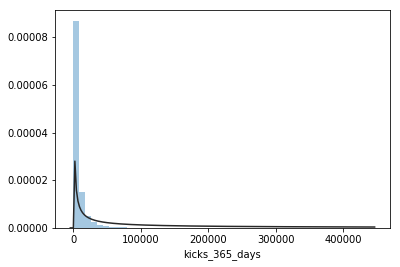

In [469]:
sns.distplot(data_kicks['kicks_365_days'], kde=False, fit=stats.powerlaw);

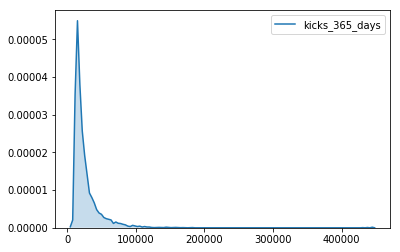

In [463]:
sns.kdeplot(data_top1['kicks_365_days'], shade=True);

In [460]:
data_fit = list(data_top1['kicks_365_days']) # data can be list or numpy array
results = powerlaw.Fit(data_fit)

Calculating best minimal value for power law fit


In [461]:
print(results.power_law.alpha)
print(results.power_law.xmin)

2.88524909906
20933.0


In [457]:
results.power_law.sigma

0.036580926982985408

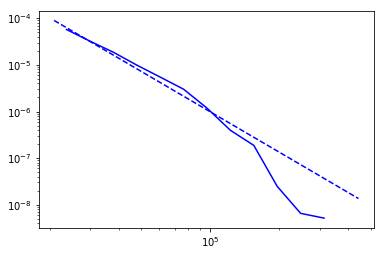

In [456]:
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')

#           Splitting Data  based on Kicks

In [58]:
0.2* data.shape[0]

6919.6

In [59]:
data['kicks_365_days'].iloc[6920]

10123

In [60]:
data[data['kicks_365_days'] > 10000].shape

(7010, 33)

In [61]:
data['kicks_365_days'].iloc[7000]

10019

In [62]:
data['kicks_365_days'].iloc[14000]

4828

In [63]:
data['kicks_365_days'].iloc[21000]

2574

In [64]:
data['kicks_365_days'].iloc[28000]

1137

# Adding Columns 

In [91]:
data_kicks['kicks_30_90_days'] = data_kicks['kicks_90_days'] - data_kicks['kicks_30_days']
data_kicks['kicks_90_180_days'] = data_kicks['kicks_180_days'] - data_kicks['kicks_90_days']
data_kicks['kicks_180_365_days'] = data_kicks['kicks_365_days'] - data_kicks['kicks_180_days']

In [327]:
data_kicks.columns

Index([u'user_id', u'signup_day', u'is_fraudster', u'profile_gender',
       u'profile_age', u'profile_has_children', u'profile_home_owner_status',
       u'profile_postal_code', u'profile_ethnicity',
       u'profile_has_linked_cards', u'profile_household_income',
       u'profile_relationship_status', u'visits_30_days', u'visits_90_days',
       u'visits_180_days', u'visits_365_days', u'Vist Points',
       u'engagements_30_days', u'engagements_90_days', u'engagements_180_days',
       u'engagements_365_days', u'Engagement Points', u'purchases_30_days',
       u'purchases_90_days', u'purchases_180_days', u'purchases_365_days',
       u'Purchase Points', u'kicks_30_days', u'kicks_90_days',
       u'kicks_180_days', u'kicks_365_days', u'Kick Points', u'Is Engaged',
       u'kicks_30_90_days', u'kicks_90_180_days', u'kicks_180_365_days',
       u'visits_30_90_days', u'visits_90_180_days', u'visits_180_365_days',
       u'engagements_30_90_days', u'engagements_90_180_days',
       u'enga

In [328]:
data_kicks.shape

(34598, 51)

In [93]:
data_kicks['visits_30_90_days'] = data_kicks['visits_90_days'] - data_kicks['visits_30_days']
data_kicks['visits_90_180_days'] = data_kicks['visits_180_days'] - data_kicks['visits_90_days']
data_kicks['visits_180_365_days'] = data_kicks['visits_365_days'] - data_kicks['visits_180_days']

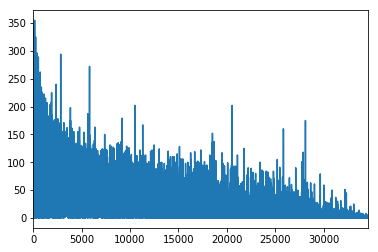

In [95]:
data_kicks['visits_30_90_days'].plot()

In [96]:
data_kicks['engagements_30_90_days'] = data_kicks['engagements_90_days'] - data_kicks['engagements_30_days']
data_kicks['engagements_90_180_days'] = data_kicks['engagements_180_days'] - data_kicks['engagements_90_days']
data_kicks['engagements_180_365_days'] = data_kicks['engagements_365_days'] - data_kicks['engagements_180_days']

In [99]:
data_kicks['purchases_30_90_days'] = data_kicks['purchases_90_days'] - data_kicks['purchases_30_days']
data_kicks['purchases_90_180_days'] = data_kicks['purchases_180_days'] - data_kicks['purchases_90_days']
data_kicks['purchases_180_365_days'] = data_kicks['purchases_365_days'] - data_kicks['purchases_180_days']

In [278]:
data_kicks = data_kicks.sort_values(by='kicks_365_days', ascending=0)

In [279]:
data_kicks.shape

(34598, 50)

In [64]:
data_kicks.to_csv('shopkick_final.csv')

In [70]:
list(data_kicks['user_id']) == list(data['user_id'])

False

# Creating Different Categories based on Kicks 

In [330]:
data_top1 = data_kicks[:7000]

In [331]:
data_top2 = data_kicks[7000 : 14000]

In [332]:
data_top3 = data_kicks[14000 : 21000]

In [333]:
data_top4 = data_kicks[21000: 28000]

In [334]:
data_top5 = data_kicks[28000:]

In [335]:
data_2 = data_kicks[7000:]

In [336]:
data_top1.to_csv("data_top_7000.csv")

In [337]:
data_top2.to_csv("data_top_7000_14000.csv")

In [338]:
data_top3.to_csv("data_top_14000_21000.csv")

In [339]:
data_top4.to_csv("data_top_21000_28000.csv")

In [340]:
data_top4.to_csv("data_top_21000_28000.csv")

In [341]:
data_top5.to_csv("data_top_last.csv")

In [342]:
data_2.to_csv("data_not_engaged.csv")

In [295]:
data_kicks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34598 entries, 0 to 34597
Data columns (total 50 columns):
user_id                        34598 non-null int64
signup_day                     34598 non-null datetime64[ns]
is_fraudster                   34598 non-null int64
profile_gender                 34598 non-null object
profile_age                    31315 non-null float64
profile_has_children           34598 non-null object
profile_home_owner_status      34598 non-null object
profile_postal_code            12468 non-null category
profile_ethnicity              34598 non-null object
profile_has_linked_cards       34598 non-null object
profile_household_income       24164 non-null object
profile_relationship_status    34598 non-null object
visits_30_days                 34598 non-null int64
visits_90_days                 34598 non-null int64
visits_180_days                34598 non-null int64
visits_365_days                34598 non-null int64
Vist Points                    0 non-n

In [131]:
import seaborn as sns

#       User Profile Variables 

# Profile - Gender

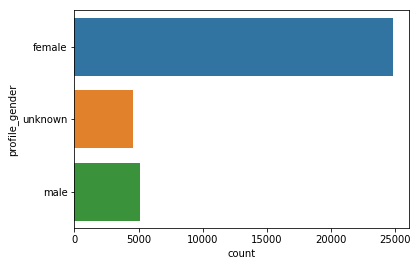

In [344]:
sns.countplot(y="profile_gender", data=data_kicks)

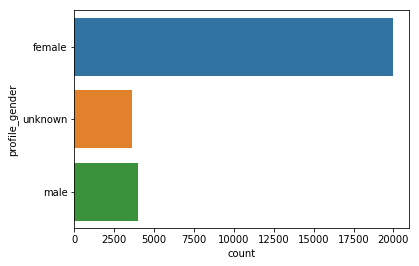

In [470]:
sns.countplot(y="profile_gender", data=data_2);

In [345]:
data_kicks['profile_gender'].unique()

array(['female', 'unknown', 'male'], dtype=object)

In [472]:
data[data_kicks['profile_gender'] == 'male']['kicks_365_days'].describe()

/Users/apple/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count      5137.000000
mean       8204.528908
std       13941.789948
min           0.000000
25%        1309.000000
50%        3468.000000
75%        8615.000000
max      182114.000000
Name: kicks_365_days, dtype: float64

In [474]:
data[data_kicks['profile_gender'] == 'unknown']['kicks_365_days'].describe()

/Users/apple/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count      4592.000000
mean       8485.105183
std       15056.050949
min           0.000000
25%        1803.750000
50%        4160.000000
75%        8871.750000
max      285478.000000
Name: kicks_365_days, dtype: float64

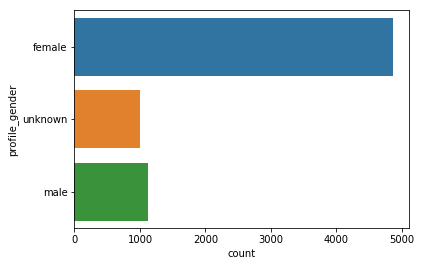

In [346]:
sns.countplot(y="profile_gender", data=data_top1)

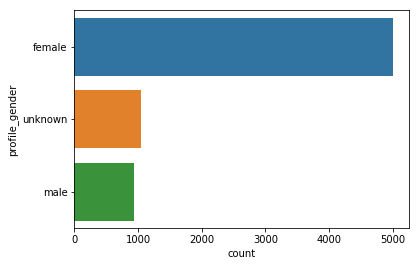

In [347]:
sns.countplot(y="profile_gender", data=data_top2)

In [146]:
data[data_kicks['profile_gender'].isnull()].shape 

/Users/apple/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(4592, 33)

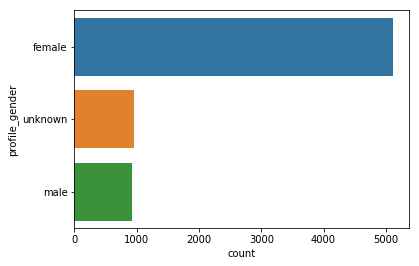

In [348]:
sns.countplot(y="profile_gender", data=data_top3)

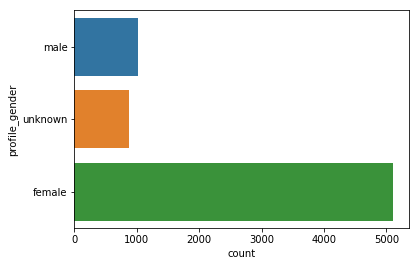

In [349]:
sns.countplot(y="profile_gender", data=data_top4)

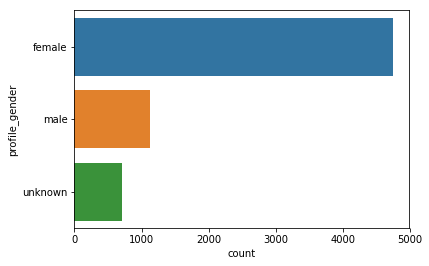

In [350]:
sns.countplot(y="profile_gender", data=data_top5)

In [148]:
data_kicks['profile_gender'].fillna('NA', inplace=True)

In [149]:
data_kicks['profile_gender'].unique()

array(['female', 'other', 'male'], dtype=object)

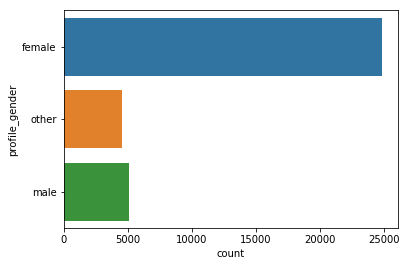

In [164]:
sns.countplot(y="profile_gender", data=data_kicks)

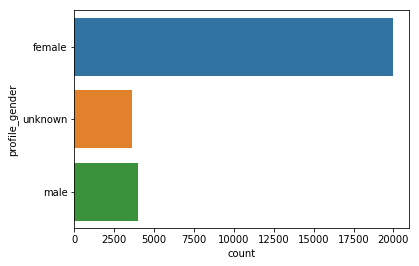

In [351]:
sns.countplot(y="profile_gender", data=data_2)

In [185]:
data_kicks['profile_gender'].value_counts()

female    24869
male       5137
other      4592
Name: profile_gender, dtype: int64

#                    Profile - Fraudester 

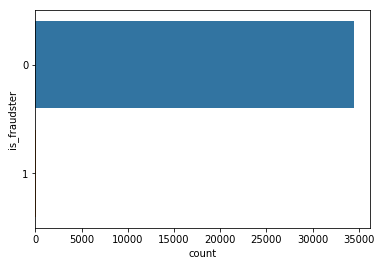

In [151]:
sns.countplot(y="is_fraudster", data=data_kicks)

In [153]:
sum(data_kicks["is_fraudster"])

68

In [154]:
data_kicks_fraudster = data[data_kicks["is_fraudster"] == 1]

/Users/apple/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [156]:
data_kicks_fraudster.shape

(68, 33)

In [352]:
data_kicks_fraudster.to_csv("fraud_data.csv")

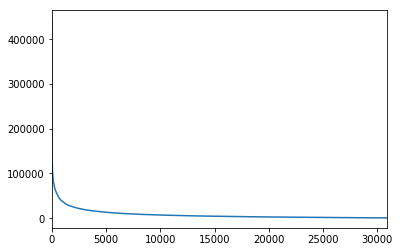

In [158]:
data_kicks_fraudster['kicks_365_days'].plot()

In [159]:
data_kicks_fraudster['kicks_365_days'].describe()

count        68.000000
mean      36611.632353
std       58811.335519
min         657.000000
25%        9975.250000
50%       18619.500000
75%       42181.250000
max      442449.000000
Name: kicks_365_days, dtype: float64

# Profile -  Relationship Status

In [165]:
data_kicks['profile_relationship_status'].fillna('unknown', inplace=True)

In [166]:
data_kicks['profile_relationship_status'].unique()

array(['married_domestic_partner', 'unknown', 'divorced', 'separated',
       'widowed', 'single_never_married'], dtype=object)

In [354]:
data_kicks['profile_relationship_status'].value_counts()

unknown                     26125
married_domestic_partner     4863
single_never_married         2484
divorced                      794
separated                     174
widowed                       158
Name: profile_relationship_status, dtype: int64

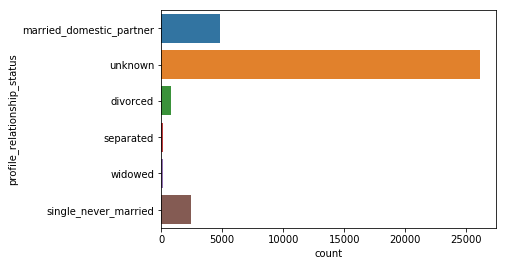

In [355]:
sns.countplot(y="profile_relationship_status", data=data_kicks)

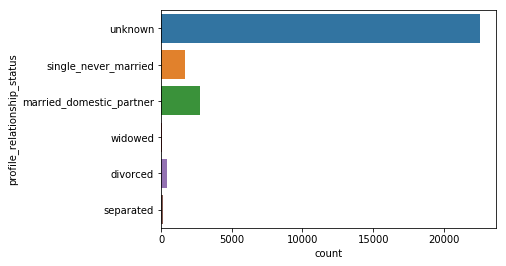

In [356]:
sns.countplot(y="profile_relationship_status", data=data_2)

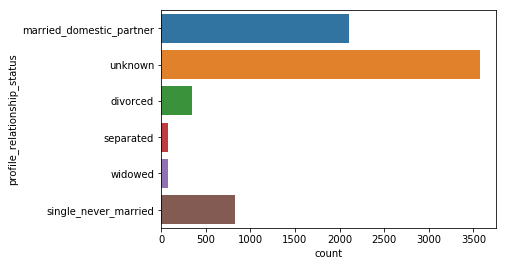

In [395]:
sns.countplot(y="profile_relationship_status", data=data_top1)

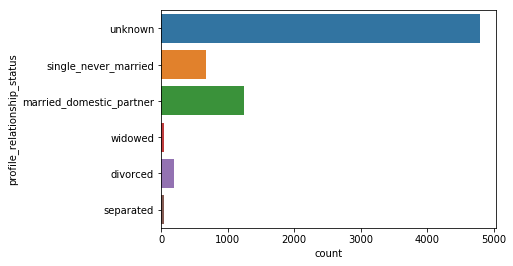

In [357]:
sns.countplot(y="profile_relationship_status", data=data_top2)

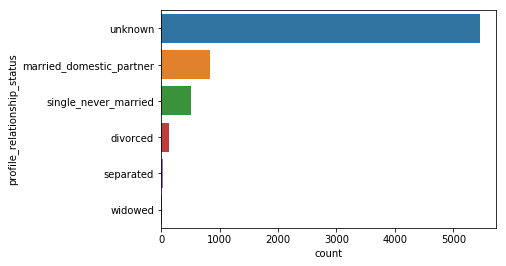

In [358]:
sns.countplot(y="profile_relationship_status", data=data_top3)

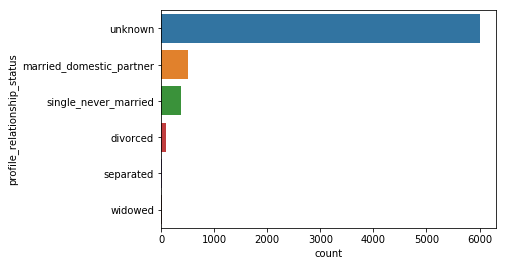

In [359]:
sns.countplot(y="profile_relationship_status", data=data_top4)

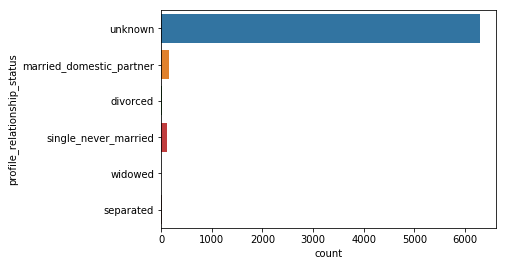

In [360]:
sns.countplot(y="profile_relationship_status", data=data_top5)

# Profile - Has Children

In [170]:
data_kicks['profile_has_children'].unique()

array([True, 'unknown'], dtype=object)

In [169]:
data_kicks['profile_has_children'].fillna('unknown', inplace=True)

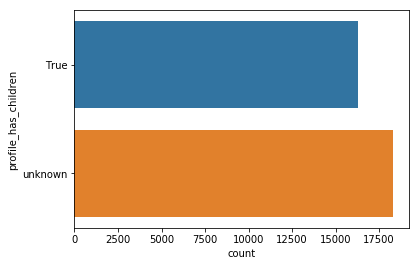

In [361]:
sns.countplot(y="profile_has_children", data=data_kicks)

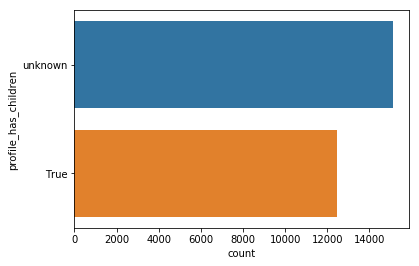

In [362]:
sns.countplot(y="profile_has_children", data=data_2)

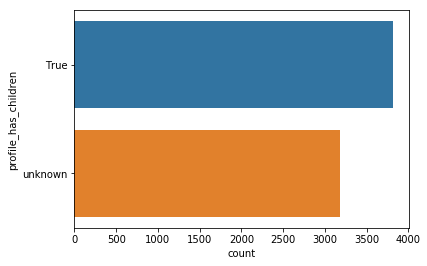

In [396]:
sns.countplot(y="profile_has_children", data=data_top1)

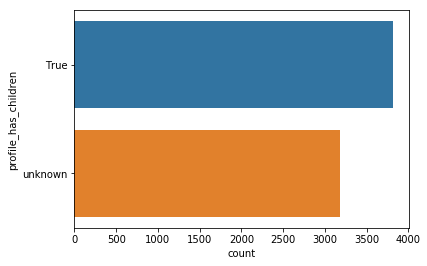

In [475]:
sns.countplot(y="profile_has_children", data=data_top1)

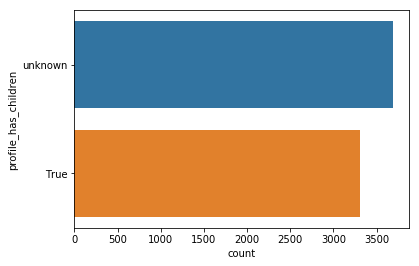

In [398]:
sns.countplot(y="profile_has_children", data=data_top3)

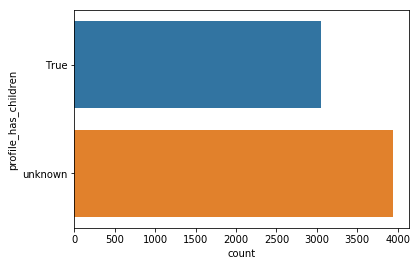

In [399]:
sns.countplot(y="profile_has_children", data=data_top4)

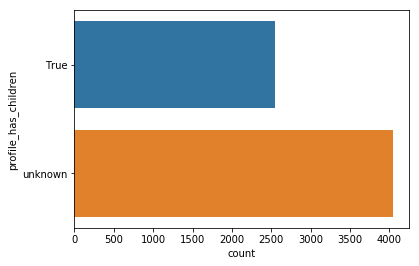

In [400]:
sns.countplot(y="profile_has_children", data=data_top5)

# profile_household_income

In [489]:
data_kicks['profile_household_income'].unique()

array(['75,000-99,999', nan, '60,000-74,999', '150,000-199,999',
       '50,000-59,999', '20,000-29,999', '100,000-124,999',
       '200,000-249,999', '125,000-149,999', '30,000-39,999',
       '40,000-49,999', '15,000-19,999', '250,000-399,999', '0-14,999',
       '400,000-499,999', '500,000+'], dtype=object)

In [63]:
data_kicks['profile_household_income'].fillna('unknown', inplace=True)

In [488]:
data_kicks['profile_home_owner_status'].fillna('unknown', inplace=True)

In [482]:
data_kicks['profile_household_income'].unique().shape

(16,)

In [495]:
data_2['profile_household_income'].value_counts()

unknown            9114
75,000-99,999      2789
60,000-74,999      2164
100,000-124,999    2013
50,000-59,999      1691
40,000-49,999      1656
30,000-39,999      1587
150,000-199,999    1497
125,000-149,999    1277
20,000-29,999      1143
250,000-399,999     779
200,000-249,999     778
0-14,999            467
15,000-19,999       450
400,000-499,999     111
500,000+             82
Name: profile_household_income, dtype: int64

In [486]:
data_top1['profile_household_income'].value_counts()

75,000-99,999      800
60,000-74,999      709
100,000-124,999    602
50,000-59,999      558
40,000-49,999      550
30,000-39,999      538
20,000-29,999      410
125,000-149,999    333
150,000-199,999    329
0-14,999           228
15,000-19,999      195
200,000-249,999    187
250,000-399,999    183
500,000+            34
400,000-499,999     24
Name: profile_household_income, dtype: int64

# Profile - House Owner Status

In [175]:
data_kicks['profile_home_owner_status'].unique()

array(['home_owner', 'unknown', 'renter', nan], dtype=object)

In [176]:
data_kicks['profile_home_owner_status'].fillna('unknown', inplace=True)

In [483]:
data_kicks['profile_home_owner_status'].value_counts()

home_owner    17880
unknown       15384
renter         1334
Name: profile_home_owner_status, dtype: int64

In [477]:
data_2['profile_home_owner_status'].value_counts()

home_owner    13856
unknown       13087
renter          655
Name: profile_home_owner_status, dtype: int64

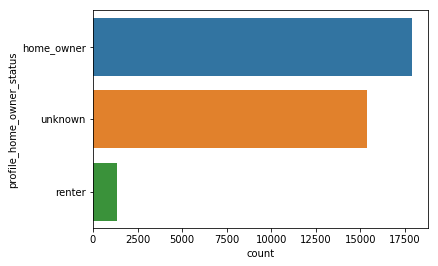

In [177]:
sns.countplot(y="profile_home_owner_status", data=data_kicks)

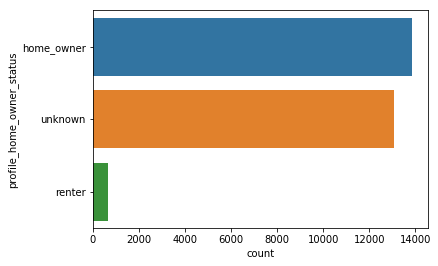

In [478]:
sns.countplot(y="profile_home_owner_status", data=data_2)

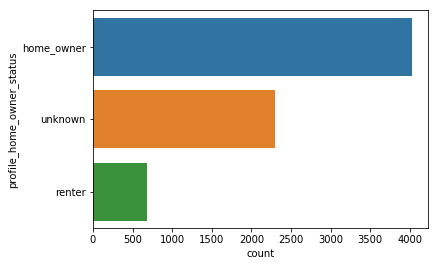

In [479]:
sns.countplot(y="profile_home_owner_status", data=data_top1)

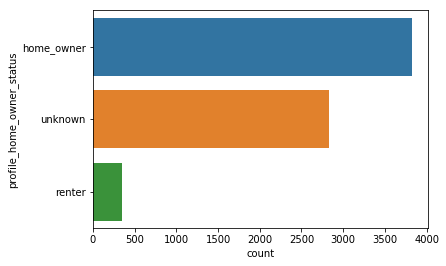

In [365]:
sns.countplot(y="profile_home_owner_status", data=data_top2)

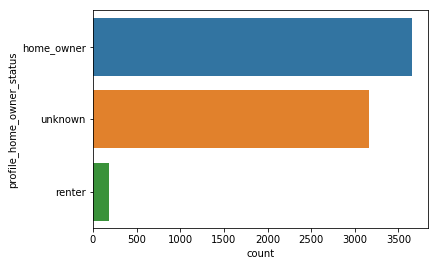

In [366]:
sns.countplot(y="profile_home_owner_status", data=data_top3)

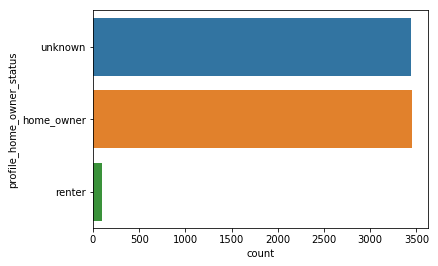

In [367]:
sns.countplot(y="profile_home_owner_status", data=data_top4)

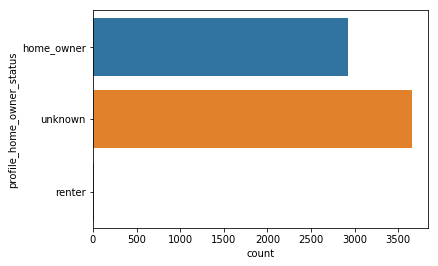

In [368]:
sns.countplot(y="profile_home_owner_status", data=data_top5)

In [183]:
data_kicks['profile_home_owner_status'].value_counts()

home_owner    17880
unknown       15384
renter         1334
Name: profile_home_owner_status, dtype: int64

In [369]:
data_2['profile_home_owner_status'].value_counts()

home_owner    13856
unknown       13087
renter          655
Name: profile_home_owner_status, dtype: int64

In [370]:
data_top2['profile_home_owner_status'].value_counts()

home_owner    3823
unknown       2826
renter         351
Name: profile_home_owner_status, dtype: int64

In [371]:
data_top3['profile_home_owner_status'].value_counts()

home_owner    3654
unknown       3158
renter         188
Name: profile_home_owner_status, dtype: int64

In [372]:
data_top4['profile_home_owner_status'].value_counts()

home_owner    3451
unknown       3447
renter         102
Name: profile_home_owner_status, dtype: int64

In [373]:
data_top5['profile_home_owner_status'].value_counts()

unknown       3656
home_owner    2928
renter          14
Name: profile_home_owner_status, dtype: int64

# Profile - Postal Code 

In [180]:
data_kicks['profile_postal_code'].unique().shape

(6946,)

In [182]:
type(data_kicks['profile_postal_code'].iloc[0])

numpy.float64

In [186]:
data_kicks['profile_postal_code'] = data_kicks['profile_postal_code'].astype('category')

In [187]:
data_kicks['profile_postal_code'].unique()

[38305.0, 98012.0, NaN, 60162.0, 47396.0, ..., 57105.0, 60505.0, 8061.0, 11229.0, 45403.0]
Length: 6946
Categories (6945, float64): [38305.0, 98012.0, 60162.0, 47396.0, ..., 60505.0, 8061.0, 11229.0, 45403.0]

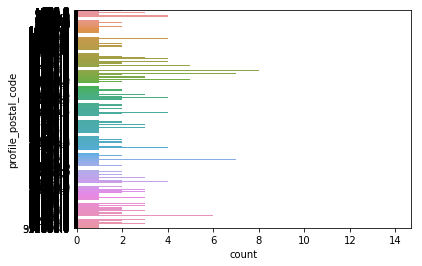

In [374]:
sns.countplot(y="profile_postal_code", data=data_kicks)

In [189]:
data_kicks['profile_postal_code'].value_counts()

32825.0    14
30909.0    13
77433.0    12
33647.0    12
23464.0    12
78501.0    11
23456.0    11
77494.0    11
20772.0    11
34787.0    11
77449.0    11
91710.0    10
78045.0    10
78521.0    10
31088.0    10
75052.0    10
23454.0     9
78249.0     9
60657.0     9
27215.0     9
77084.0     9
60626.0     9
16001.0     9
34711.0     9
78247.0     9
78550.0     9
92880.0     9
38305.0     9
29732.0     9
30907.0     9
           ..
49431.0     1
49448.0     1
49002.0     1
49455.0     1
49460.0     1
49504.0     1
49507.0     1
49509.0     1
49534.0     1
49601.0     1
49301.0     1
49283.0     1
49277.0     1
49250.0     1
49008.0     1
49009.0     1
49015.0     1
49028.0     1
49030.0     1
49055.0     1
49058.0     1
49073.0     1
49078.0     1
49087.0     1
49096.0     1
49107.0     1
49202.0     1
49220.0     1
49240.0     1
0.0         1
Name: profile_postal_code, Length: 6945, dtype: int64

#                                            Profile -  Ethinicity

In [193]:
data_kicks['profile_ethnicity'].unique().shape

(9,)

In [375]:
data_kicks['profile_ethnicity'].value_counts()

white_caucasian           15516
unknown                   10810
black_african_american     4332
hispanic                   2868
asian                       735
other                       225
native_american              65
middle_eastern               47
Name: profile_ethnicity, dtype: int64

In [195]:
data_kicks['profile_ethnicity'].unique()

array(['black_african_american', 'unknown', 'white_caucasian',
       'native_american', 'hispanic', 'asian', 'other', 'middle_eastern',
       nan], dtype=object)

In [196]:
data_kicks['profile_ethnicity'].fillna('unknown', inplace=True)

# Plots 

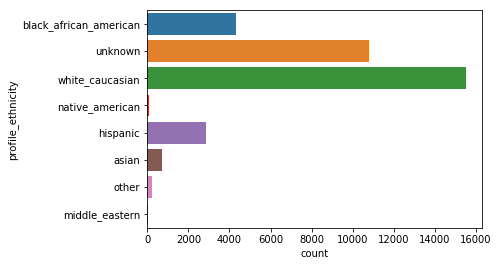

In [199]:
sns.countplot(y="profile_ethnicity", data=data_kicks)

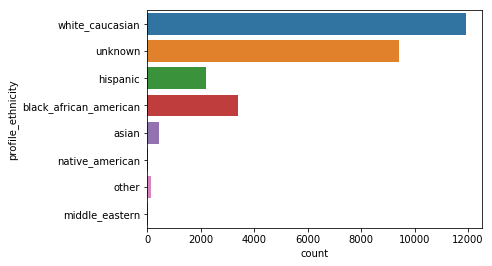

In [376]:
sns.countplot(y="profile_ethnicity", data=data_2)

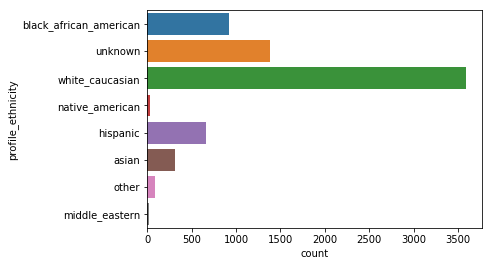

In [402]:
sns.countplot(y="profile_ethnicity", data=data_top1)

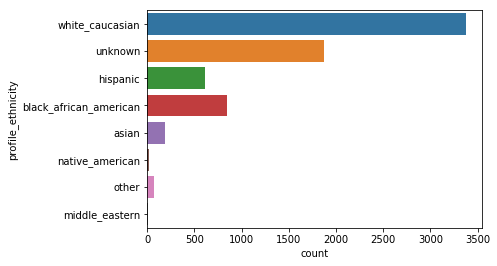

In [378]:
sns.countplot(y="profile_ethnicity", data=data_top2)

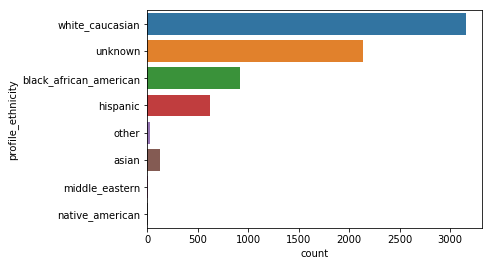

In [379]:
sns.countplot(y="profile_ethnicity", data=data_top3)

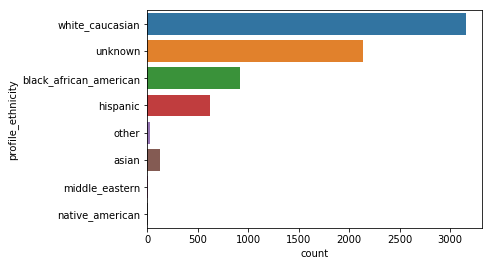

In [380]:
sns.countplot(y="profile_ethnicity", data=data_top3)

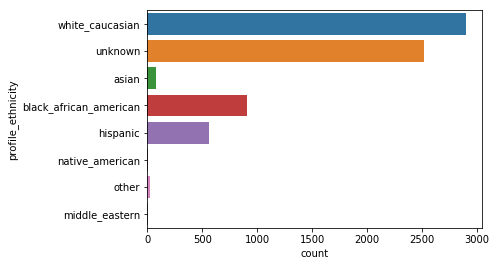

In [381]:
sns.countplot(y="profile_ethnicity", data=data_top4)

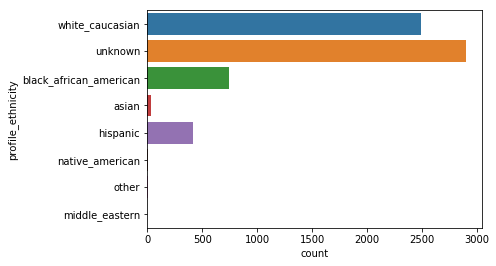

In [382]:
sns.countplot(y="profile_ethnicity", data=data_top5)

#                            profile - Has_linked_cards                 

In [200]:
data_kicks['profile_has_linked_cards'].unique()

array([True, nan], dtype=object)

In [201]:
data_kicks['profile_has_linked_cards'].value_counts()

True    20588
Name: profile_has_linked_cards, dtype: int64

In [202]:
data_kicks['profile_has_linked_cards'].fillna('unknown', inplace=True)

In [497]:
data_2['profile_has_linked_cards'].value_counts()

True       15651
unknown    11947
Name: profile_has_linked_cards, dtype: int64

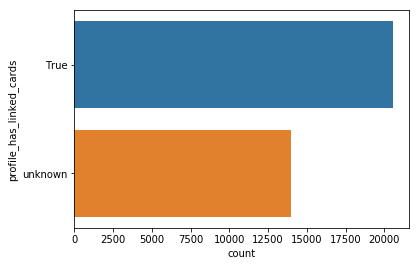

In [383]:
sns.countplot(y="profile_has_linked_cards", data=data_kicks)

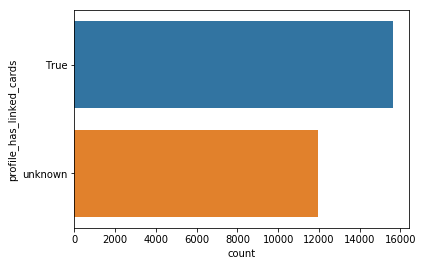

In [384]:
sns.countplot(y="profile_has_linked_cards", data=data_2)

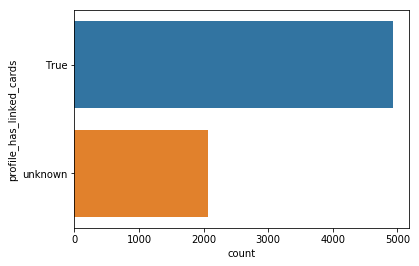

In [403]:
sns.countplot(y="profile_has_linked_cards", data=data_top1)

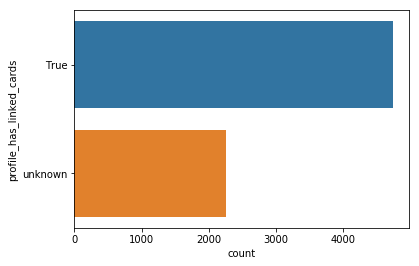

In [385]:
sns.countplot(y="profile_has_linked_cards", data=data_top2)

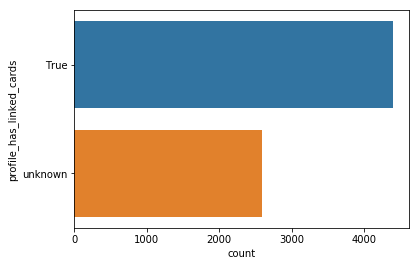

In [386]:
sns.countplot(y="profile_has_linked_cards", data=data_top3)

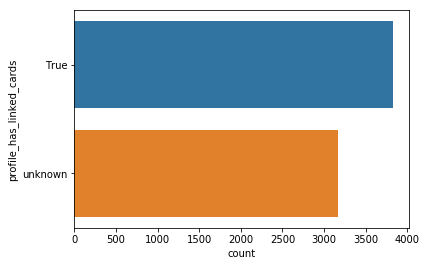

In [387]:
sns.countplot(y="profile_has_linked_cards", data=data_top4)

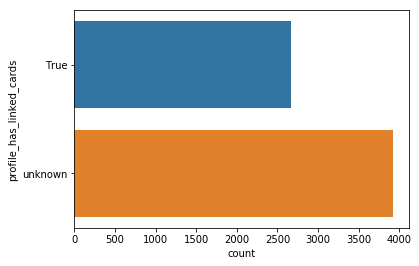

In [388]:
sns.countplot(y="profile_has_linked_cards", data=data_top5)

#                    Profile - Signup Day 

In [214]:
type(data_kicks['signup_day'].iloc[0])

pandas._libs.tslib.Timestamp

In [213]:
data_kicks['signup_day'] = pd.to_datetime(data_kicks['signup_day'])

In [217]:
data_kicks['signup_day'].value_counts()

2017-11-24    339
2017-11-25    276
2017-12-16    218
2017-11-23    214
2017-11-26    212
2017-12-15    205
2018-01-03    199
2017-12-17    199
2017-12-30    197
2018-01-04    196
2017-12-26    192
2017-11-05    188
2017-12-28    187
2017-12-14    183
2018-01-01    183
2017-11-12    182
2017-11-30    180
2017-12-03    177
2017-12-02    175
2017-11-18    174
2017-11-27    173
2018-01-07    172
2017-12-27    171
2017-12-06    169
2017-12-23    168
2017-11-28    168
2017-11-11    167
2017-12-18    165
2017-11-04    165
2017-12-31    161
             ... 
2017-03-08     36
2018-02-17     36
2018-02-11     35
2018-02-04     35
2017-02-14     35
2018-02-19     34
2018-02-02     28
2017-04-10     28
2018-02-16     27
2018-01-29     27
2018-01-30     27
2018-02-08     26
2018-02-07     24
2018-01-31     23
2018-02-20     22
2018-02-12     22
2018-02-23     21
2018-02-14     20
2018-02-13     19
2018-02-24     19
2018-02-25     18
2018-02-15     17
2018-02-01     17
2018-02-06     16
2018-02-22

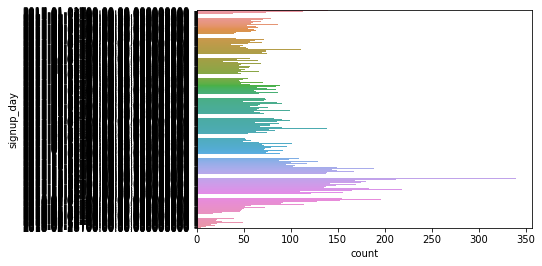

In [219]:
sns.countplot(y="signup_day", data=data_kicks)

In [225]:
# Breaking Date to multiple columns - Year,Month, Week, Day

In [223]:
data_kicks['signup_year'] = pd.Series(data_kicks['signup_day'].map(lambda x: x.year))

In [227]:
data_kicks.head()

user_id signup_day  is_fraudster profile_gender  profile_age  \
0  34245751354 2017-10-19             1         female         33.0   
1  28697635187 2017-01-28             0          other          NaN   
2  29005152258 2017-03-31             0          other         32.0   
3  28846430713 2017-02-28             0         female         52.0   
4  29200831573 2017-04-21             0           male         45.0   

  profile_has_children profile_home_owner_status profile_postal_code  \
0                 True                home_owner             38305.0   
1              unknown                   unknown             98012.0   
2              unknown                   unknown                 NaN   
3              unknown                    renter             60162.0   
4                 True                home_owner                 NaN   

        profile_ethnicity profile_has_linked_cards      ...       \
0  black_african_american                     True      ...        
1                 unknown                  unknown      ...        
2                 unknown                  unknown      ...        
3  black_african_american                     True      ...        
4  black_african_american                  unknown      ...        

  visits_90_180_days visits_180_365_days  engagements_30_90_days  \
0                 41                   0                     414   
1                  1                   0                       2   
2                  5                   3                     174   
3                444                 878                     710   
4                  8                  11                      86   

   engagements_90_180_days  engagements_180_365_days  purchases_30_90_days  \
0                       44                         0                    13   
1                      117                       333                     2   
2                      231                      1829                   156   
3                     1238                      3565                    37   
4                      222                       582                    78   

   purchases_90_180_days  purchases_180_365_days  signup_year  signup_month  
0                      5                       0         2017            10  
1                    116                     331         2017             1  
2                    227                    1827         2017             3  
3                     75                     195         2017             2  
4                    212                     571         2017             4  

[5 rows x 47 columns]

In [234]:
data_kicks['signup_year'].value_counts()

2017    31136
2018     3462
Name: signup_year, dtype: int64

In [226]:
data_kicks['signup_month'] = pd.Series(data_kicks['signup_day'].map(lambda x: x.month))

In [228]:
data_kicks['signup_month'].value_counts()

1     5103
12    4911
11    4905
10    2971
8     2533
7     2324
6     2298
2     2234
9     2053
5     1860
3     1826
4     1580
Name: signup_month, dtype: int64

In [233]:
data_kicks['signup_month'].unique().shape

(12,)

In [251]:
data_kicks['year_month'] = pd.to_datetime(pd.Series(data_kicks['signup_day'].map(lambda x: str(x.year) + "-"  + str(x.month))))

In [501]:
data_top1['signup_year_month'].value_counts()

2017-01-01    894
2017-03-01    751
2017-06-01    694
2017-05-01    663
2017-02-01    649
2017-07-01    615
2017-04-01    574
2017-08-01    567
2017-11-01    499
2017-10-01    431
2017-09-01    381
2017-12-01    243
2018-01-01     37
2018-02-01      2
Name: signup_year_month, dtype: int64

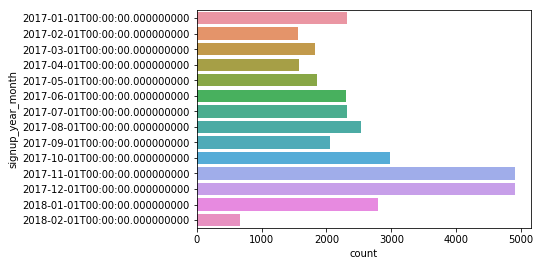

In [259]:
sns.countplot(y="signup_year_month", data=data_kicks)

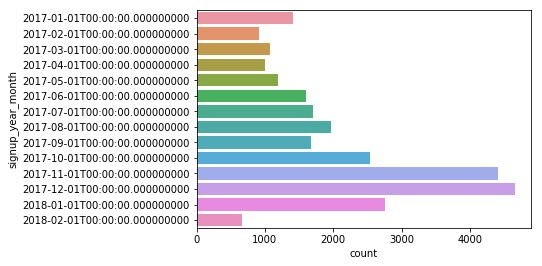

In [389]:
sns.countplot(y="signup_year_month", data=data_2)

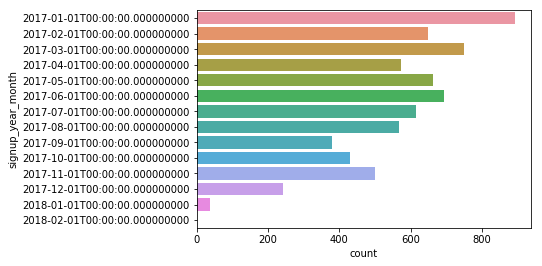

In [394]:
sns.countplot(y="signup_year_month", data=data_top1)

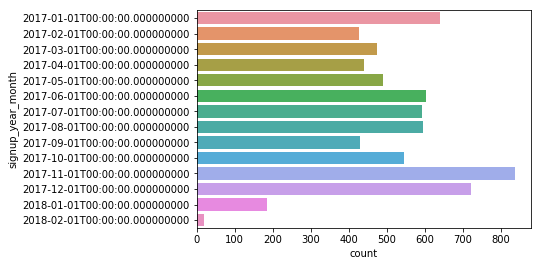

In [390]:
sns.countplot(y="signup_year_month", data=data_top2)

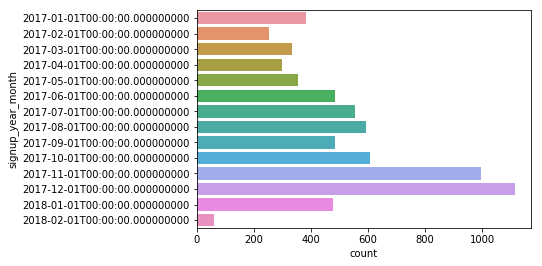

In [391]:
sns.countplot(y="signup_year_month", data=data_top3)

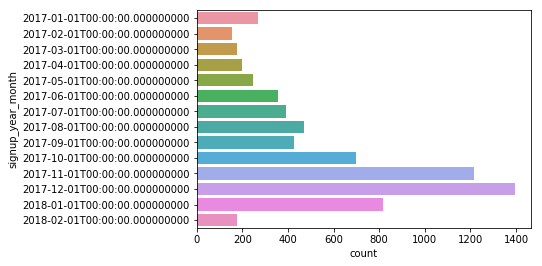

In [392]:
sns.countplot(y="signup_year_month", data=data_top4)

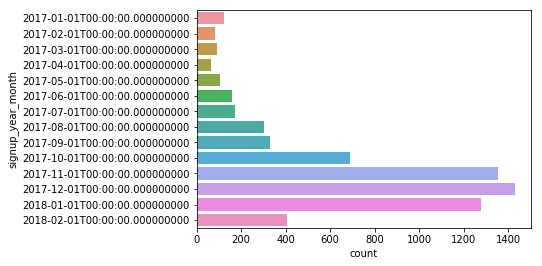

In [393]:
sns.countplot(y="signup_year_month", data=data_top5)

In [255]:
type(data_kicks['year_month'].iloc[0])

pandas._libs.tslib.Timestamp

In [229]:
data_kicks['signup_date'] = pd.Series(data_kicks['signup_day'].map(lambda x: x.day))

In [257]:
data_kicks = data_kicks.rename(columns={'year_month': 'signup_year_month'})

In [258]:
data_kicks.columns

Index([u'user_id', u'signup_day', u'is_fraudster', u'profile_gender',
       u'profile_age', u'profile_has_children', u'profile_home_owner_status',
       u'profile_postal_code', u'profile_ethnicity',
       u'profile_has_linked_cards', u'profile_household_income',
       u'profile_relationship_status', u'visits_30_days', u'visits_90_days',
       u'visits_180_days', u'visits_365_days', u'Vist Points',
       u'engagements_30_days', u'engagements_90_days', u'engagements_180_days',
       u'engagements_365_days', u'Engagement Points', u'purchases_30_days',
       u'purchases_90_days', u'purchases_180_days', u'purchases_365_days',
       u'Purchase Points', u'kicks_30_days', u'kicks_90_days',
       u'kicks_180_days', u'kicks_365_days', u'Kick Points', u'Is Engaged',
       u'kicks_30_90_days', u'kicks_90_180_days', u'kicks_180_365_days',
       u'visits_30_90_days', u'visits_90_180_days', u'visits_180_365_days',
       u'engagements_30_90_days', u'engagements_90_180_days',
       u'enga

In [232]:
data_kicks['signup_date'].unique().shape

(31,)

In [235]:
data_kicks['signup_date'].value_counts()

3     1298
2     1221
4     1221
26    1221
24    1220
1     1207
17    1202
18    1196
14    1188
5     1163
16    1156
23    1155
22    1150
19    1149
15    1146
9     1138
25    1135
21    1108
8     1106
11    1100
6     1096
28    1084
7     1078
27    1067
20    1067
29    1047
12    1040
30    1027
13    1016
10    1005
31     591
Name: signup_date, dtype: int64

#  Signup Period - Mar 1 2018 - Date

In [268]:
(pd.to_datetime('2018-03-01') - data_kicks['signup_day'].iloc[0]).days

133

In [263]:
pd.to_datetime('2018-03-01')

Timestamp('2018-03-01 00:00:00')

In [269]:
data_kicks['signup_period'] = pd.Series(data_kicks['signup_day'].map(lambda x: (pd.to_datetime('2018-03-01') - x).days))

In [270]:
data_kicks['signup_period'].head()

0    133
1    397
2    335
3    366
4    314
Name: signup_period, dtype: int64

In [271]:
data_kicks['signup_period'].describe()

count    34598.000000
mean       191.115267
std        115.699112
min          1.000000
25%         92.000000
50%        165.000000
75%        280.000000
max        424.000000
Name: signup_period, dtype: float64

In [404]:
data_top1['signup_period'].describe()

count    7000.000000
mean      268.156571
std       101.771464
min        17.000000
25%       192.000000
50%       275.000000
75%       357.000000
max       424.000000
Name: signup_period, dtype: float64

In [405]:
data_2['signup_period'].describe()

count    27598.000000
mean       171.574389
std        110.759026
min          1.000000
25%         82.000000
50%        135.000000
75%        250.000000
max        424.000000
Name: signup_period, dtype: float64

In [406]:
data_top2['signup_period'].describe()

count    7000.000000
mean      225.316714
std       111.906462
min        12.000000
25%       119.000000
50%       221.000000
75%       320.000000
max       424.000000
Name: signup_period, dtype: float64

In [407]:
data_top3['signup_period'].describe()

count    7000.000000
mean      187.436571
std       109.352894
min         3.000000
25%        94.000000
50%       165.000000
75%       265.000000
max       424.000000
Name: signup_period, dtype: float64

In [408]:
data_top4['signup_period'].describe()

count    7000.000000
mean      153.999857
std       102.949229
min         2.000000
25%        76.000000
50%       117.000000
75%       215.000000
max       424.000000
Name: signup_period, dtype: float64

In [409]:
data_top5['signup_period'].describe()

count    6598.000000
mean      116.374356
std        85.989966
min         1.000000
25%        59.000000
50%        94.000000
75%       138.000000
max       424.000000
Name: signup_period, dtype: float64

In [274]:
pd.to_datetime('2018-03-01') - pd.to_datetime('2017-01-01')

Timedelta('424 days 00:00:00')

In [299]:
data_kicks['profile_gender'] = data_kicks['profile_gender'].replace('other','unknown')

# Date - Categorical Values 

In [314]:
import numpy as np
pd.cut(x=np.array(data_kicks['profile_age']),bins=10)

[(23.5, 34.0], NaN, (23.5, 34.0], (44.5, 55.0], (44.5, 55.0], ..., (23.5, 34.0], NaN, (65.5, 76.0], (34.0, 44.5], (44.5, 55.0]]
Length: 34598
Categories (10, interval[float64]): [(12.895, 23.5] < (23.5, 34.0] < (34.0, 44.5] < (44.5, 55.0] ... (76.0, 86.5] < (86.5, 97.0] < (97.0, 107.5] < (107.5, 118.0]]

In [324]:
data_kicks['profile_age_bins'] = pd.cut(x=np.array(data_kicks['profile_age']),bins=[10,20,25,30,35,40,45,50,55,60,120])

In [325]:
data_kicks['profile_age_bins'].value_counts()

(25, 30]     4904
(30, 35]     4736
(20, 25]     4589
(35, 40]     4186
(40, 45]     3382
(45, 50]     3039
(50, 55]     2251
(60, 120]    1494
(55, 60]     1460
(10, 20]     1274
Name: profile_age_bins, dtype: int64

#        Profile - Age 

In [326]:
data_kicks['profile_age'].describe()

count    31315.000000
mean        37.682197
std         12.482230
min         13.000000
25%         28.000000
50%         36.000000
75%         46.000000
max        118.000000
Name: profile_age, dtype: float64

In [410]:
data_2['profile_age'].describe()

count    24627.000000
mean        36.643237
std         12.298924
min         13.000000
25%         27.000000
50%         35.000000
75%         45.000000
max        118.000000
Name: profile_age, dtype: float64

In [411]:
data_top1['profile_age'].describe()

count    6688.000000
mean       41.507925
std        12.407430
min        13.000000
25%        32.000000
50%        40.000000
75%        50.000000
max       118.000000
Name: profile_age, dtype: float64

In [412]:
data_top2['profile_age'].describe()

count    6404.000000
mean       38.071205
std        12.054600
min        13.000000
25%        29.000000
50%        36.000000
75%        46.000000
max       117.000000
Name: profile_age, dtype: float64

In [413]:
data_top3['profile_age'].describe()

count    6224.000000
mean       36.949550
std        12.299115
min        13.000000
25%        27.000000
50%        35.000000
75%        45.000000
max       118.000000
Name: profile_age, dtype: float64

In [414]:
data_top4['profile_age'].describe()

count    6155.000000
mean       36.051503
std        12.247626
min        13.000000
25%        26.000000
50%        34.000000
75%        44.000000
max        78.000000
Name: profile_age, dtype: float64

In [415]:
data_top5['profile_age'].describe()

count    5844.000000
mean       35.375428
std        12.444739
min        13.000000
25%        25.000000
50%        33.000000
75%        44.000000
max       117.000000
Name: profile_age, dtype: float64

#                            Activities